<a href="https://colab.research.google.com/github/mostafijurrcse/Sales-Prediction-Using-Python-/blob/main/SALES_PREDICTION_USING_FIVE_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nasarulhoque","key":"d5148c29a7f151666b22d1353c690c4c"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d bumba5341/advertisingcsv

  0% 0.00/2.26k [00:00<?, ?B/s]
100% 2.26k/2.26k [00:00<00:00, 5.77MB/s]


In [7]:
!unzip advertisingcsv.zip

Archive:  advertisingcsv.zip
  inflating: Advertising.csv         


In [9]:
import pandas as pd

In [10]:
# Load dataset
df = pd.read_csv("/content/Advertising.csv")

In [ ]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


##  Analysis of Data

In [11]:
# Remove the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
df.shape

(200, 4)

In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [16]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(200, 4)

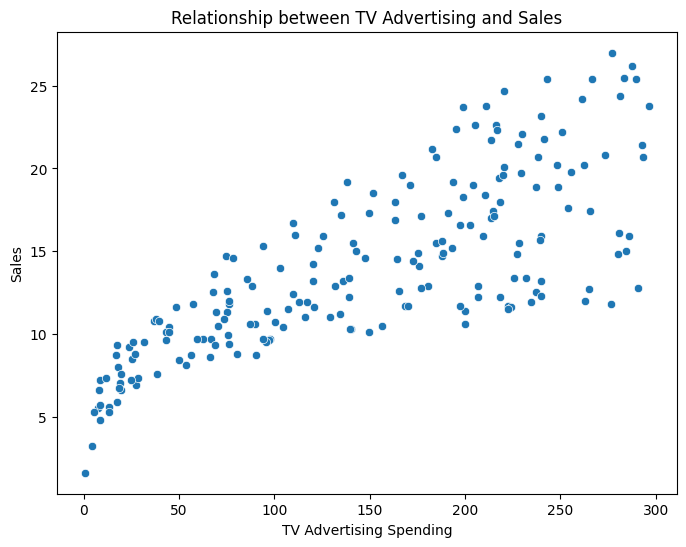

In [18]:
# Explore and visualize relationships
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Scatter plot between 'TV' advertising spending and 'Sales'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.title('Relationship between TV Advertising and Sales')
plt.show()

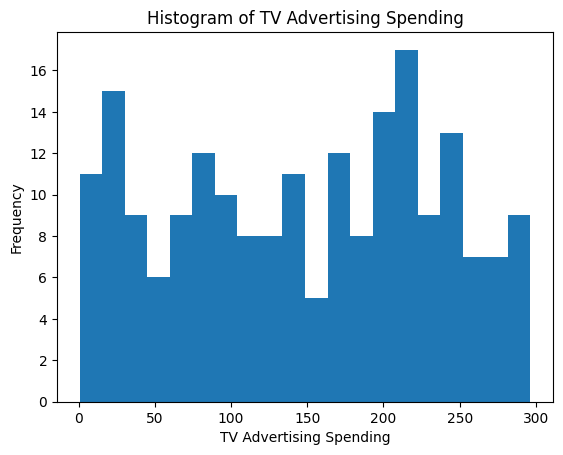

In [19]:
# Example: Histogram for 'TV' advertising spending
plt.hist(df['TV'], bins=20)
plt.xlabel('TV Advertising Spending')
plt.ylabel('Frequency')
plt.title('Histogram of TV Advertising Spending')
plt.show()

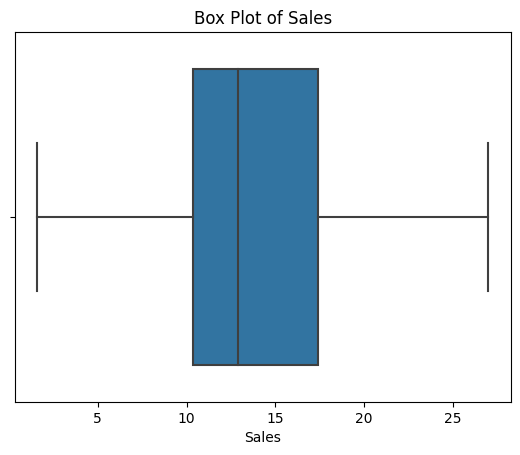

In [20]:
# Example: Box plot for 'Sales'
sns.boxplot(x=df['Sales'])
plt.xlabel('Sales')
plt.title('Box Plot of Sales')
plt.show()

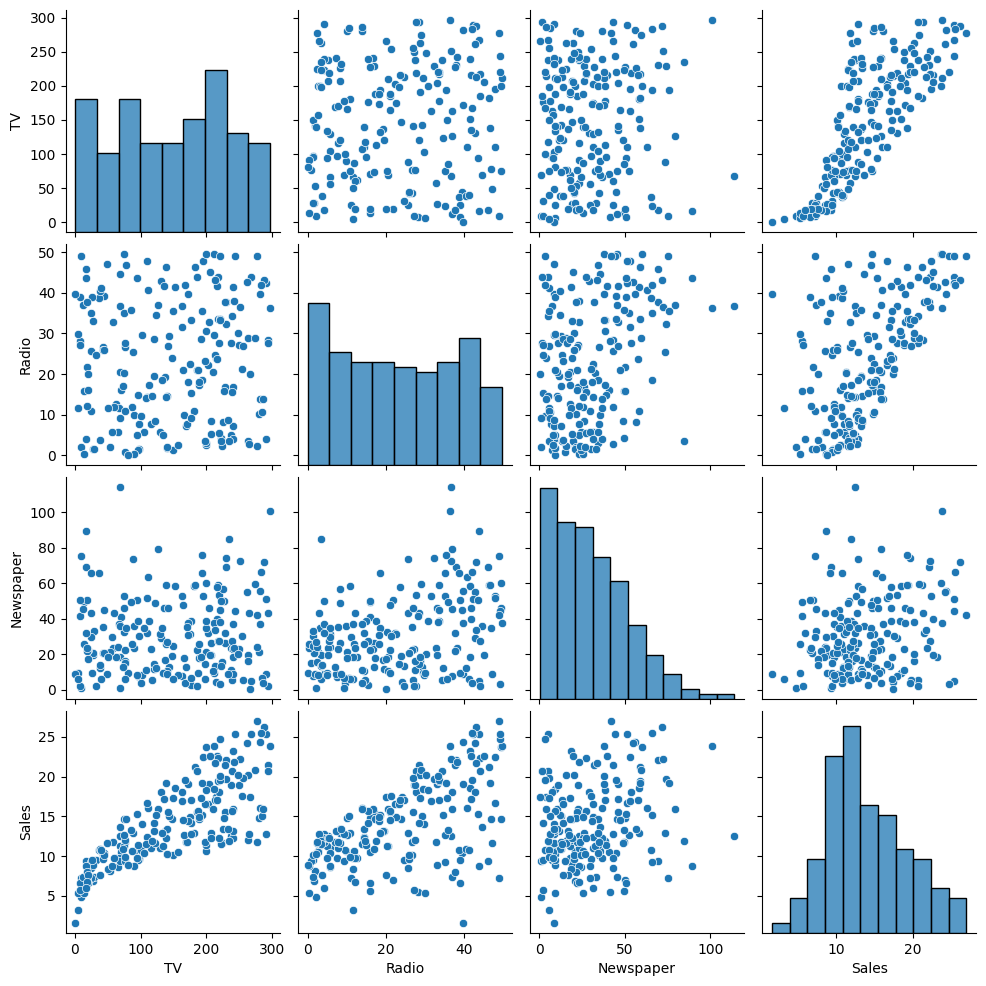

In [21]:
sns.pairplot(df)
plt.show()

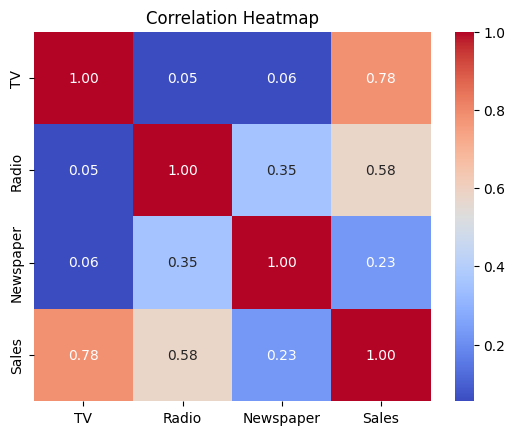

In [22]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering

In [23]:
# You can create new features here if needed.
# Example: Creating a feature 'Total_Advertising_Spending'
df['Total_Advertising_Spending'] = df['TV'] + df['Radio'] + df['Newspaper']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TV                          200 non-null    float64
 1   Radio                       200 non-null    float64
 2   Newspaper                   200 non-null    float64
 3   Sales                       200 non-null    float64
 4   Total_Advertising_Spending  200 non-null    float64
dtypes: float64(5)
memory usage: 9.4 KB


In [25]:
df.head()

,TV,Radio,Newspaper,Sales,Total_Advertising_Spending
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


## Modles Training

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Split the data into training and testing sets
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_linear.predict(X_test)

In [29]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.174097353976106
R-squared: 0.8994380241009119


### Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_tree.predict(X_test)

In [31]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.5800000000000007
R-squared: 0.9499423287311826


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a random forest model
model_forest = RandomForestRegressor(random_state=42)
model_forest.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_forest.predict(X_test)

In [33]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.2455171750000056
R-squared: 0.9605394371482174


### Gradient Boosting Regressor


In [34]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train a gradient boosting model
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_gb.predict(X_test)

In [35]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.8866993355895187
R-squared: 0.9719075292055577


### SVM


In [36]:
from sklearn.svm import SVR

# Initialize and train an SVM regression model
model_svm = SVR(kernel='linear')  # You can choose different kernel functions like 'rbf' for non-linear relationships
model_svm.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_svm.predict(X_test)

In [37]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.6038483136402535
R-squared: 0.8858226239323508


## Prediction

In [38]:
import random

# Step 1: Take random 5 rows from the dataset with columns TV, Radio, Newspaper
random.seed(42)  # Setting a seed for reproducibility
sample_data = df[['TV', 'Radio', 'Newspaper']].sample(5)

In [39]:
sample_data

,TV,Radio,Newspaper
61,261.3,42.7,54.7
113,209.6,20.6,10.7
168,215.4,23.6,57.6
65,69.0,9.3,0.9
160,172.5,18.1,30.7


In [40]:
# Step 2: Add the 'Total_Advertising_Spending' column
sample_data['Total_Advertising_Spending'] = sample_data['TV'] + sample_data['Radio'] + sample_data['Newspaper']

In [41]:
sample_data

,TV,Radio,Newspaper,Total_Advertising_Spending
61,261.3,42.7,54.7,358.7
113,209.6,20.6,10.7,240.9
168,215.4,23.6,57.6,296.6
65,69.0,9.3,0.9,79.2
160,172.5,18.1,30.7,221.3


In [42]:
# Step 3: Make predictions using the five models
linear_predictions = model_linear.predict(sample_data)
tree_predictions = model_tree.predict(sample_data)
forest_predictions = model_forest.predict(sample_data)
gb_predictions = model_gb.predict(sample_data)
svm_predictions = model_svm.predict(sample_data)

In [43]:
# Step 4: Create a table with original value (Sales from sample data) and predictions
sample_data['Original Value'] = df.loc[sample_data.index, 'Sales']

predictions_table = pd.DataFrame({
    'Original Value': sample_data['Original Value'],
    'Linear Regression Prediction': linear_predictions,
    'Decision Tree Prediction': tree_predictions,
    'Random Forest Prediction': forest_predictions,
    'Gradient Boosting Prediction': gb_predictions,
    'SVM Prediction': svm_predictions
})

In [44]:
# Print the table
predictions_table

,Original Value,Linear Regression Prediction,Decision Tree Prediction,Random Forest Prediction,Gradient Boosting Prediction,SVM Prediction
61,24.2,22.896552,24.2,24.577,24.368709,23.123222
113,15.9,16.281336,15.9,15.985,15.938025,16.496330
168,17.1,17.237849,17.1,17.095,16.718056,17.311079
65,9.3,7.827403,9.9,9.690,9.691749,8.246511
160,14.4,14.204106,14.4,14.524,14.588849,14.398546
